Age (In years)

Sex 1 - Male 0 - Female

CP (Chest Pain Type)  0 - Typical Angina (Heart related) 1 - Atypical Angina (Non-heart related) 2 - Non-Anginal pain (Non-heart related) 3 - Asymptomatic (No disease)

TRESTBPS (Resting Blood Pressure (in mm Hg on admission to the hospital))

CHOL (Serum Cholestoral in mg/dl) Healthy serum cholesterol is less than 200 mg/dL

FPS (Fasting blood sugar > 120 mg/dl) 1 - True 0 - False

RESTECH (Resting Electro Cardio Graphic results)

THALACH (Maximum heart rate achieved)

EXANG (Exercise induced Angina) 1 - Yes 0 - No

OLDPEAK (ST depression induced by exercise relative to rest)

SLOPE (Slope of the peak exercise ST segment)

CA (Number of major vessels (0-3) colored by Flouroscopy)

THAL 0 - Normal 1 - Fixed defect 2 - Reversible defect

TARGET 1 - Heart Problem 0 - No Heart Problem

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
df.columns = [
    "Age", "Sex", "Chest Pain Type",
    "Resting Blood Pressure (mmHg)",
    "Serum Cholesterol (mg/dL)",
    "Fasting Blood Sugar (>120 mg/dL)",
    "Resting Electro Cardio",
    "Max Heart Rate",
    "Exercise Induced Angina",
    "Oldpeak", "Slope",
    "# of Major Vessels","Thalassemia",
    "Target"
]

In [4]:
df.isnull().sum(axis=0)

Age                                 0
Sex                                 0
Chest Pain Type                     0
Resting Blood Pressure (mmHg)       0
Serum Cholesterol (mg/dL)           0
Fasting Blood Sugar (>120 mg/dL)    0
Resting Electro Cardio              0
Max Heart Rate                      0
Exercise Induced Angina             0
Oldpeak                             0
Slope                               0
# of Major Vessels                  0
Thalassemia                         0
Target                              0
dtype: int64

In [5]:
df.describe()

,Age,Sex,Chest Pain Type,Resting Blood Pressure (mmHg),Serum Cholesterol (mg/dL),Fasting Blood Sugar (>120 mg/dL),Resting Electro Cardio,Max Heart Rate,Exercise Induced Angina,Oldpeak,Slope,# of Major Vessels,Thalassemia,Target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Let us first examine the correlation between each variables. Perhaps there may be stronger correlation for a pair of variables over others which suggests influential features and/or patterns. But first, we let us see the number of unique values for categorical variables as this will determine the method of correlation and which features need to be excluded.

In [6]:
print(df.nunique(),'\n')
for col, val in df.nunique().items():
    if val > 2:
        print('{:<35s}{}'.format(col,val))

Age                                  41
Sex                                   2
Chest Pain Type                       4
Resting Blood Pressure (mmHg)        49
Serum Cholesterol (mg/dL)           152
Fasting Blood Sugar (>120 mg/dL)      2
Resting Electro Cardio                3
Max Heart Rate                       91
Exercise Induced Angina               2
Oldpeak                              40
Slope                                 3
# of Major Vessels                    5
Thalassemia                           4
Target                                2
dtype: int64 

Age                                41
Chest Pain Type                    4
Resting Blood Pressure (mmHg)      49
Serum Cholesterol (mg/dL)          152
Resting Electro Cardio             3
Max Heart Rate                     91
Oldpeak                            40
Slope                              3
# of Major Vessels                 5
Thalassemia                        4


Some of the categorical features have more than 2 unique values. This means that we cannot use Pearson's Correlation Coefficient for this whole dataset because this method measures the association between two continuous variables. Furthermore, Pearson makes a lot of assumptions that are not necessarily true or even applicable to categorical features such as:

1. Linear relationship
2. Homoscedasticity (error term same across all independent variables)

What we can do is make each category for each feature it's own binary variable (1 (Yes), 0 (No)). This transforms into Point-Biserial Correlation which measures the strength of association between a continuous variable and a binary variable which holds the same assumptions of Pearson's Correlation.

In [7]:
df = pd.get_dummies(df,columns=[
    "Chest Pain Type", "Resting Electro Cardio",
    "Slope", "Thalassemia"
])
df.head()

,Age,Sex,Resting Blood Pressure (mmHg),Serum Cholesterol (mg/dL),Fasting Blood Sugar (>120 mg/dL),Max Heart Rate,Exercise Induced Angina,Oldpeak,# of Major Vessels,Target,...,Resting Electro Cardio_0,Resting Electro Cardio_1,Resting Electro Cardio_2,Slope_0,Slope_1,Slope_2,Thalassemia_0,Thalassemia_1,Thalassemia_2,Thalassemia_3
0,52,1,125,212,0,168,0,1.0,2,0,...,0,1,0,0,0,1,0,0,0,1
1,53,1,140,203,1,155,1,3.1,0,0,...,1,0,0,1,0,0,0,0,0,1
2,70,1,145,174,0,125,1,2.6,0,0,...,0,1,0,1,0,0,0,0,0,1
3,61,1,148,203,0,161,0,0.0,1,0,...,0,1,0,0,0,1,0,0,0,1
4,62,0,138,294,1,106,0,1.9,3,0,...,0,1,0,0,1,0,0,0,1,0


In [8]:
df_corr = round(df.corr(),3)

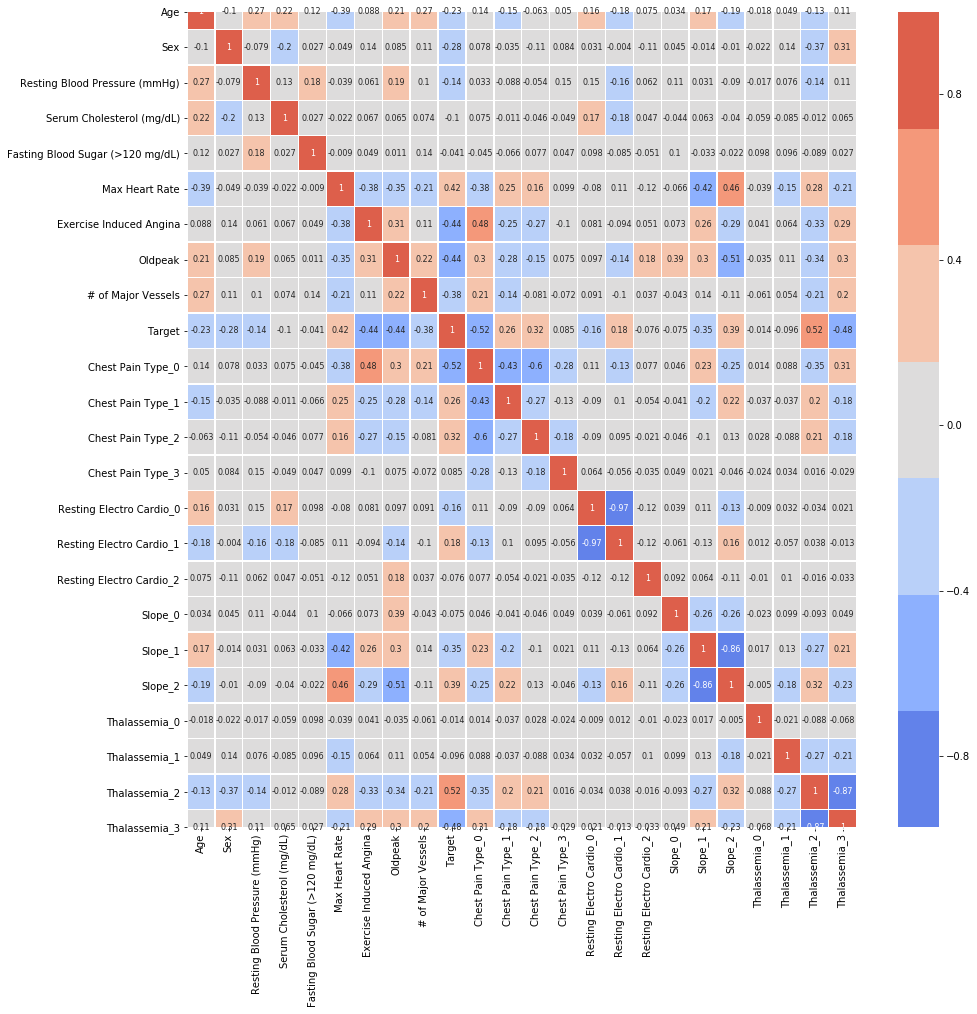

In [9]:
fig, ax = plt.subplots(figsize=(15,15))

ax = sns.heatmap(
    df_corr,
    cmap=sns.color_palette("coolwarm", 7),
    annot=True, 
    linewidths=0.5,
    annot_kws={"fontsize":8}
) 

The heatmap shows that there are no strong positive or negative correlation between any two variables. Although there are strong negative correlations, these are for the dummy variables.

Let us try non-parametric methods and not make any assumptions of the dataset. This also relieves us from worrying about collinearity which is a very common problem for regression (not regression trees) which are parametric.

We will first try a decision tree followed by random forest.

In [10]:
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix

X = df.drop("Target", axis=1)
y = df["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

decision_tree = DTC(criterion="gini", random_state=7)
accuracy = cross_val_score(decision_tree, X_train, y_train, cv=10)
print(accuracy)
accuracy.mean()

[0.97222222 0.94444444 0.98611111 1.         1.         1.
 0.98611111 0.97222222 0.95774648 0.9       ]


0.9718857589984351

Good average accuracy score, let us proceed to fit the model into the dataset.

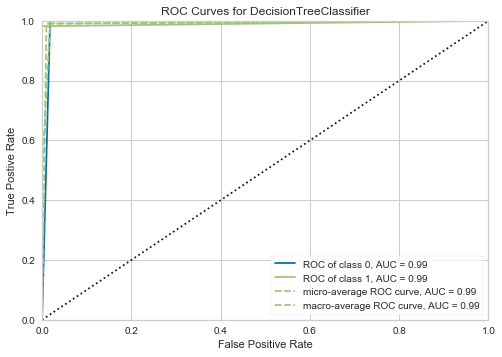

In [11]:
from yellowbrick.classifier import ROCAUC

tree_ROC = ROCAUC(decision_tree)

fig = plt.Figure()

tree_ROC.fit(X_train,y_train)
tree_ROC.score(X_test, y_test)

ax = tree_ROC.show()

In [12]:
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

conf_matrix = pd.DataFrame(
    confusion_matrix(y_test,y_pred),
    columns = ["Predicted Normal Heart", "Predicted Heart Problem"],
    index = ["True Normal Heart", "True Heart Problem"]
)
conf_matrix

Accuracy: 0.9902597402597403


,Predicted Normal Heart,Predicted Heart Problem
True Normal Heart,141,0
True Heart Problem,3,164


99% accuracy score. The confusion matrix only shows 3 false positives and 0 false negatives! The decision tree serves as a close to perfect model for this dataset.

However, in general, decision trees are not flexible when it comes to classifying new samples. This is where Random Forest comes in.

In [13]:
from sklearn import tree
import pydotplus

dot_graph = tree.export_graphviz(decision_tree, out_file=None, filled=True, rounded=True, feature_names=X.columns)
tree_graph = pydotplus.graph_from_dot_data(dot_graph)

# Refer to the separate portable network graphics.
tree_graph.write_png("tree.png")

True

Random Forest is a type of Bootstrap Aggregation (Bagging) method aimed to reduce variance frequently used in decision trees. While Bagging takes repeated samples from the same training data sets, train the method, and average all predictions, Random Forest, in addition, performs an additional tweak in the procedure. When the tree is split, a random sample of "m" predictors is chosen from "p" predictors. 

How is that useful? Variance and correlation are the downfall of using decision trees in real life application (when there are a lot of features). In other words, there may be multiple strong predictors that results in highly correlated predictions resulting in overfitting. By combining multiple decision trees with various subset of predictors, the model ultimately makes a final prediction by averaging the predictions of each tree which lowers the variance.

In [14]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import GridSearchCV

random = RFC(criterion='gini', random_state=7)

parameters = {
    'n_estimators':np.arange(5,51,5),
    'max_depth':np.arange(1,15)
}

grid = GridSearchCV(random, parameters, iid=True, cv=5)
grid.fit(X_train, y_train)
grid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)

In [15]:
random = RFC(
    n_estimators=15,
    max_depth=10,
    criterion='gini',
    random_state=7
)

random.fit(X_train, y_train)
random_pred = random.predict(X_test)
random_prob = random.predict_proba(X_test)

conf_matrix = pd.DataFrame(
    confusion_matrix(y_test,random_pred),
    columns = ["Predicted Normal Heart", "Predicted Heart Problem"],
    index = ["True Normal Heart", "True Heart Problem"]
)

conf_matrix

,Predicted Normal Heart,Predicted Heart Problem
True Normal Heart,141,0
True Heart Problem,5,162


In [16]:
fi = pd.DataFrame({'feature': list(X_train.columns),
                   'importance': random.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi.head()

,feature,importance
8,# of Major Vessels,0.113585
5,Max Heart Rate,0.110822
3,Serum Cholesterol (mg/dL),0.084572
9,Chest Pain Type_0,0.083405
0,Age,0.081096


Almost identical predictions as the decision tree (only 2 more false positives). However, the feature importance are different. As shown by the single decision tree, the highest feature was chest pain type. For random forest, the most important feature turned out to be # of Major Vessels. 

We already know that the drawback of decision tree is high variance. Random forest has its own disadvantage as well. The model tends to have high complexity thus less interpretable and intuitive making it hard to get a grasp of the relationship between the predictor and response.
Which one should we choose? That is the matter of domain knowledge and/or objective of the study. 

1. Do you know from previous study that, in fact, a particular feature is a stronger predictor?
2. Is the objective to have better accuracy or interpretability?

Now, let's try to implement Support Vector Machines (SVM). SVM is a discriminative classifier formally defined by a separating hyperplane which is a function that differentiates between features. It is very effective in high dimension cases and when classes are separable. 

"C" parameter is a regularization parameter for optimizing misclassification prevention. A large C implements a smaller-margin hyperplane and vice versa. 

"Gamma" parameter defines how far the influence of a single training example reaches, with low values considering points far away from plausible separation line and high values considering points close to plausible line.

In [18]:
from sklearn.svm import SVC

parameter = {
    "kernel":['linear','rbf'],
    "gamma":['auto','scale'],
    "C":np.logspace(-1,3,5)
}

supvec = SVC(random_state=7)
grid = GridSearchCV(supvec, parameter, iid=True, cv=5)
grid.fit(X_train, y_train)
grid.best_estimator_

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=7, shrinking=True, tol=0.001,
    verbose=False)

In [19]:
supvec = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=7, shrinking=True, tol=0.001,
    verbose=False)

supvec.fit(X_train, y_train)
supvec_pred = supvec.predict(X_test)

conf_matrix = pd.DataFrame(
    confusion_matrix(y_test,supvec_pred),
    columns = ["Predicted Normal Heart", "Predicted Heart Problem"],
    index = ["True Normal Heart", "True Heart Problem"]
)

print(conf_matrix)

supvec.score(X_test,y_test)

                    Predicted Normal Heart  Predicted Heart Problem
True Normal Heart                      138                        3
True Heart Problem                       0                      167


0.9902597402597403

Generally, SVM produces more accurate results than Decision Tree. However, SVM is considered a black box classifier which means that it does not naturally provide any useful inutitive reasons about why an input is classified in one class rather than the other. But since, in this case, SVM and the Decision Tree had the same accuracy score, this shows that the decision tree is a very good classifier for this dataset.  